In [151]:
import fileprocessing
import multianalysis
import HMMC
from multiprocessing import Pool
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cooldir = '/pollard/data/chromatin_organization/rao2014/distiller-0.3.1_hg19/results'

In [4]:
cools = fileprocessing.get_files(cooldir)

In [5]:
df = fileprocessing.cools_df(cools, resolution = 100000)

In [6]:
df

,cell_line,assembly,path,cooler
0,NHEK,hg19,/pollard/data/chromatin_organization/rao2014/d...,"<Cooler ""NHEK_inSitu_MboI.hg19.mapq_30.1000.mc..."
1,IMR90,hg19,/pollard/data/chromatin_organization/rao2014/d...,"<Cooler ""IMR90_inSitu_MboI.hg19.mapq_30.1000.m..."
2,K562,hg19,/pollard/data/chromatin_organization/rao2014/d...,"<Cooler ""K562_inSitu_MboI.hg19.mapq_30.1000.mc..."
3,HUVEC,hg19,/pollard/data/chromatin_organization/rao2014/d...,"<Cooler ""HUVEC_inSitu_MboI.hg19.mapq_30.1000.m..."
4,HMEC,hg19,/pollard/data/chromatin_organization/rao2014/d...,"<Cooler ""HMEC_inSitu_MboI.hg19.mapq_30.1000.mc..."
5,KBM7,hg19,/pollard/data/chromatin_organization/rao2014/d...,"<Cooler ""KBM7_inSitu_MboI.hg19.mapq_30.1000.mc..."
6,GM12878,hg19,/pollard/data/chromatin_organization/rao2014/d...,"<Cooler ""GM12878_inSitu_MboI.hg19.mapq_30.1000..."


In [7]:
genecov_dict = fileprocessing.get_genecov(df)

In [10]:
vals, tracks = multianalysis.get_eigs(df, genecov_dict, n = 3)

In [12]:
with Pool(processes=len(tracks)) as pool:
    hmm_tracks = pool.map(HMMC.auto_analyze, tracks)

[ 0.  2. -2. ... -2.  0.  0.]


Fitting a model with 23 free scalar parameters with only 18 data points will result in a degenerate solution.
Fitting a model with 34 free scalar parameters with only 18 data points will result in a degenerate solution.
Fitting a model with 47 free scalar parameters with only 18 data points will result in a degenerate solution.


[ 2. -2.  2. ... -4.  3.  0.]


Fitting a model with 34 free scalar parameters with only 29 data points will result in a degenerate solution.
Fitting a model with 47 free scalar parameters with only 29 data points will result in a degenerate solution.


[ 2. -2.  2. ...  3.  0.  0.]
[ 0.  2. -2. ... -3.  4.  0.]

Fitting a model with 23 free scalar parameters with only 20 data points will result in a degenerate solution.


Fitting a model with 34 free scalar parameters with only 20 data points will result in a degenerate solution.
Fitting a model with 47 free scalar parameters with only 20 data points will result in a degenerate solution.


[ 0.  2. -2. ...  2. -3.  0.]
[ 2. -2.  2. ...  0.  2.  0.]
[ 2. -2.  0. ...  2. -2.  0.]


In [110]:
for i, hmm_track in enumerate(hmm_tracks):
    hmm_track.to_csv(df.iloc[i].cell_line +".tsv", index=False, sep="\t")

In [24]:
one_track = hmm_tracks[6][hmm_tracks[6]["E1"] == hmm_tracks[6]["E1"]]

In [25]:
one_track.binary.unique()

array([1., 0.])

In [87]:
mat = np.zeros((len(one_track.binary.unique()), len(one_track.HMM5_2.unique())))

In [88]:
for i in range(mat.shape[0]):
    for j in range(mat.shape[1]):
        mat[i,j] = len(one_track[(one_track["binary"]==i) & (one_track["HMM5_2"]==j)])
        

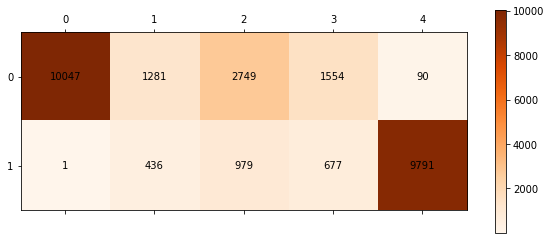

In [89]:
plt.matshow(mat, cmap="Oranges")
plt.colorbar()
for i in range(mat.shape[0]):
        for j in range(mat.shape[1]):
            text = plt.gca().text(j, i, int(mat[i, j]),
                           ha="center", va="center", color="black")

In [78]:
def between_cells(hmm_track1, hmm_track2, hmm):
    mask = (hmm_track1["E1"] == hmm_track1["E1"]) & (hmm_track2["E1"] == hmm_track2["E1"])
    track1= hmm_track1[mask]
    track2= hmm_track2[mask]
    
    size = len(track1[hmm].unique())
    mat = np.zeros((size, size))
    for i in range(mat.shape[0]):
        for j in range(mat.shape[1]):
            mat[i,j] = ((track1[hmm]==i) & (track2[hmm]==j)).sum()
    
    return mat

In [143]:
def plot_mat(mat, states_names, cell_name1, cell_name2):
    plt.figure(1, figsize=(10,10))
    plt.matshow(mat, cmap="Oranges", fignum=1)

    plt.ylabel(cell_name1)
    plt.xlabel(cell_name2)
    ticks = np.arange(0, len(states_names), 1)
    plt.gca().set_yticks(ticks)
    plt.gca().set_xticks(ticks)
    plt.gca().set_yticklabels(states_names)
    plt.gca().set_xticklabels(states_names)
    plt.colorbar()
    for i in range(mat.shape[0]):
            for j in range(mat.shape[1]):
                text = plt.gca().text(j, i, np.round(mat[i, j],2),
                               ha="center", va="center", color="black")

In [149]:
def plot_mat2(mat, states_names, cell_name1, cell_name2):
    plt.figure(1, figsize=(10,10))
    plt.matshow(mat, cmap="bwr", fignum=1,  vmin=0, vmax=2)

    plt.ylabel(cell_name1)
    plt.xlabel(cell_name2)
    ticks = np.arange(0, len(states_names), 1)
    plt.gca().set_yticks(ticks)
    plt.gca().set_xticks(ticks)
    plt.gca().set_yticklabels(states_names)
    plt.gca().set_xticklabels(states_names)
    plt.colorbar()
    for i in range(mat.shape[0]):
            for j in range(mat.shape[1]):
                text = plt.gca().text(j, i, np.round(mat[i, j],2),
                               ha="center", va="center", color="black")

In [123]:
mat = between_cells(hmm_tracks[6], hmm_tracks[1], "HMM5_2")

In [135]:
p1 = mat.sum(axis=0, keepdims=True)
p1 = p1/p1.sum()
p2 = mat.sum(axis=1, keepdims=True)
p2 = p2/p2.sum()
mat2 = np.dot(p2, p1)
mat2*mat.sum()

array([[3429.01370417,  708.01939893, 1610.16140054,  693.45109854,
        3472.35439782],
       [ 589.77790433,  121.77676538,  276.94191344,  119.27107062,
         597.23234624],
       [1272.95172312,  262.83782791,  597.73973106,  257.42964215,
        1289.04107576],
       [ 758.58237196,  156.6313469 ,  356.20739952,  153.40847968,
         768.17040194],
       [3364.67429642,  694.73466089, 1579.94955544,  680.43970902,
        3407.20177823]])

In [145]:
p1

array([[0.34591079, 0.07142332, 0.16242927, 0.06995371, 0.3502829 ]])

In [138]:
mat/(mat2*mat.sum())

array([[1.891506  , 1.0451691 , 0.94773108, 0.52202672, 0.23010324],
       [0.84777676, 3.42429854, 1.34324197, 0.45275019, 0.60612926],
       [0.94111974, 1.11475583, 1.63783659, 1.06436849, 0.72612116],
       [0.85422496, 0.58736646, 1.03029864, 2.84860394, 0.84486463],
       [0.17327086, 0.57863818, 0.74496049, 1.14190867, 1.99225066]])

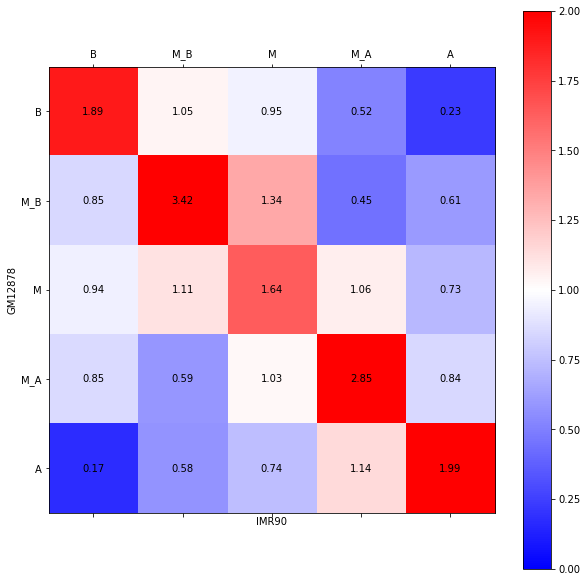

In [150]:
plot_mat2(mat/(mat2*mat.sum()), ["B", "M_B", "M", "M_A", "A"], "GM12878", "IMR90")


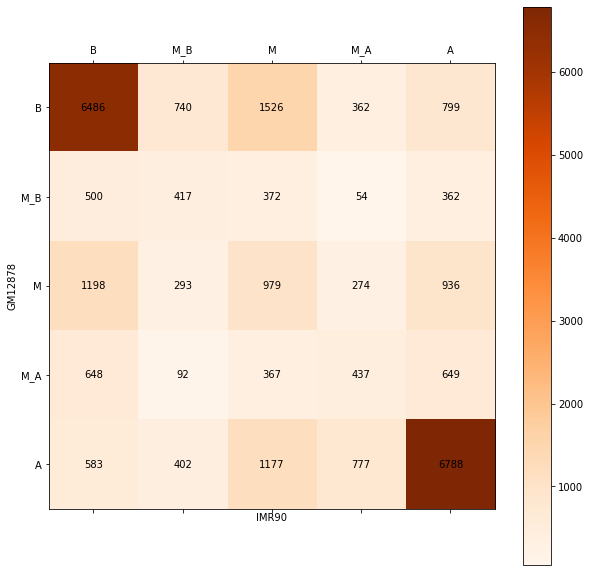

In [137]:
plot_mat(mat, ["B", "M_B", "M", "M_A", "A"], "GM12878", "IMR90")


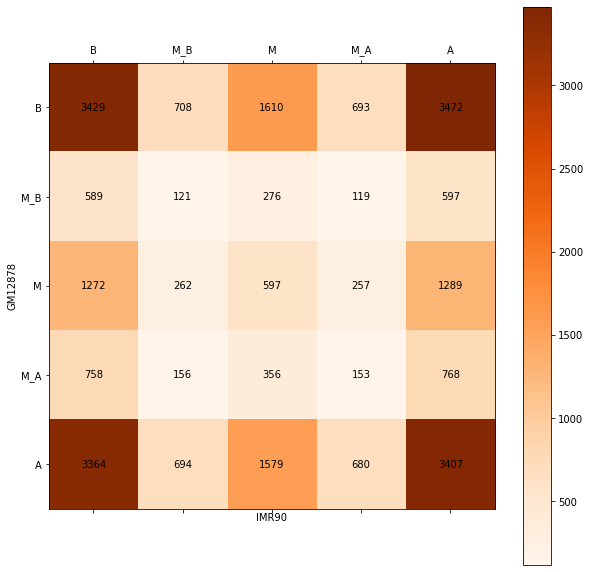

In [136]:
plot_mat(mat2*mat.sum(), ["B", "M_B", "M", "M_A", "A"], "GM12878", "IMR90")


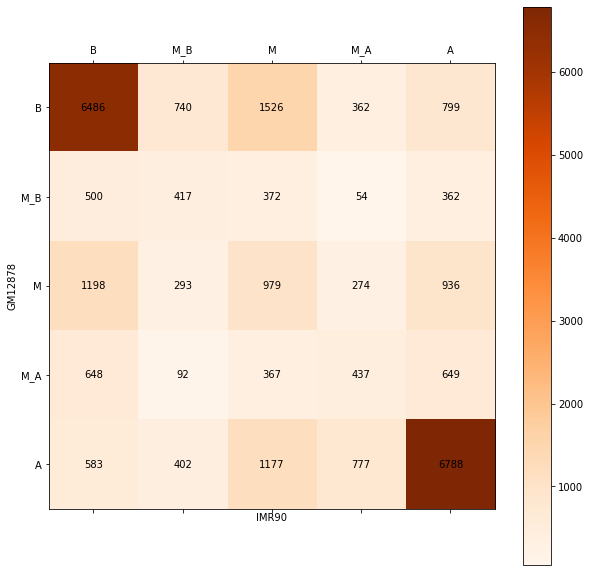

In [124]:
plot_mat(between_cells(hmm_tracks[6], hmm_tracks[1], "HMM5_2"), ["B", "M_B", "M", "M_A", "A"], "GM12878", "IMR90")


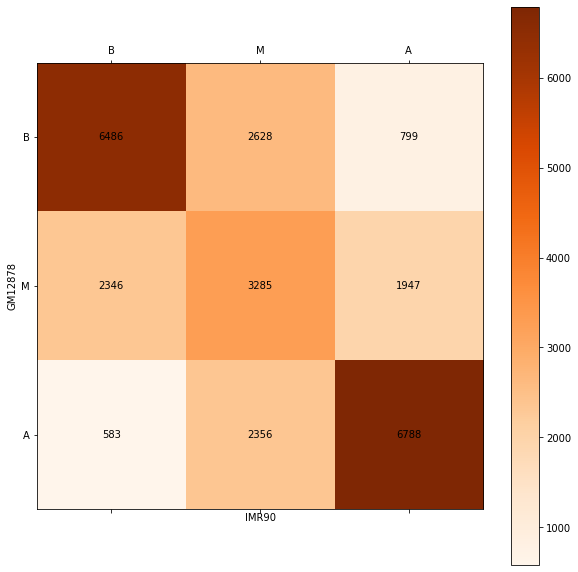

In [92]:
plot_mat(between_cells(hmm_tracks[6], hmm_tracks[1], "HMM3"), ["B", "M", "A"], "GM12878", "IMR90")


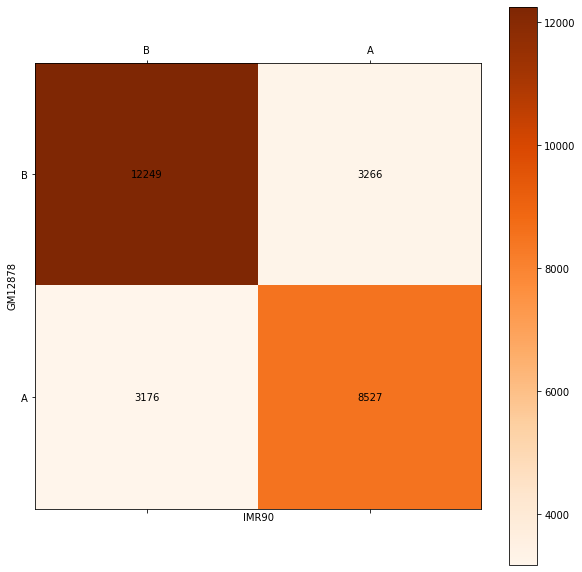

In [93]:
plot_mat(between_cells(hmm_tracks[6], hmm_tracks[1], "binary"), ["B", "A"], "GM12878", "IMR90")


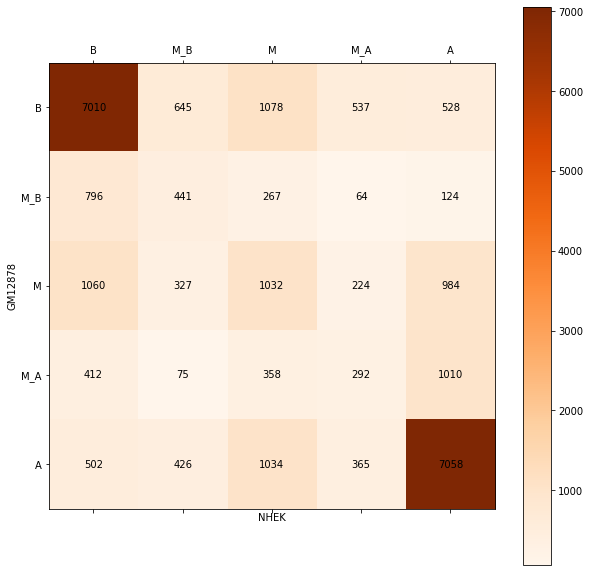

In [94]:
plot_mat(between_cells(hmm_tracks[6], hmm_tracks[0], "HMM5_2"), ["B", "M_B", "M", "M_A", "A"], "GM12878", "NHEK")


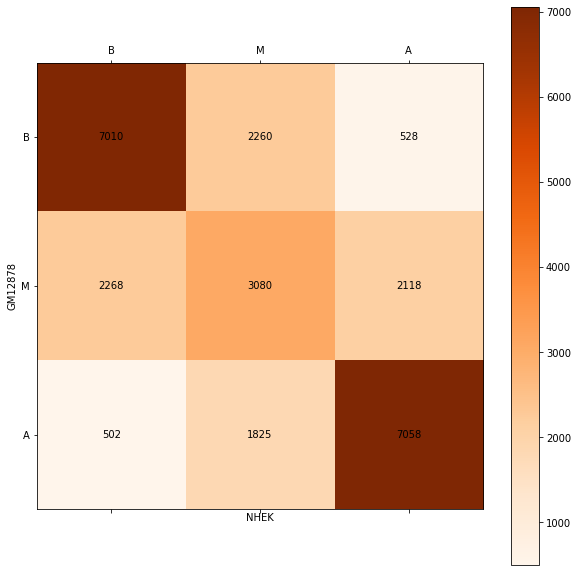

In [95]:
plot_mat(between_cells(hmm_tracks[6], hmm_tracks[0], "HMM3"), ["B","M", "A"], "GM12878", "NHEK")


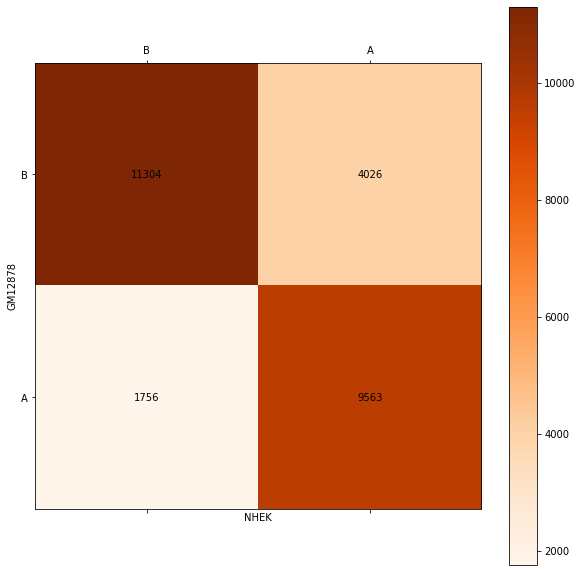

In [97]:
plot_mat(between_cells(hmm_tracks[6], hmm_tracks[0], "binary"), ["B","A"], "GM12878", "NHEK")
